# 다항 회귀(Polynomial Regression)

In [34]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
# 다항식으로 변환한 단항식 생성, 2x2 행렬 생성
x = np.array([[1,2]])
#x = np.arange(4).reshape(2,2)

# degree = 3인 3차 다항식으로 변환
pf = PolynomialFeatures(degree=2, include_bias=False)
pf.fit(x)
xt = pf.transform(x)
xt

array([[1., 2., 1., 2., 4.]])

In [29]:
x2 = np.array([[3,4]])
xt = pf.transform(x2)
xt

array([[ 3.,  4.,  9., 12., 16.]])

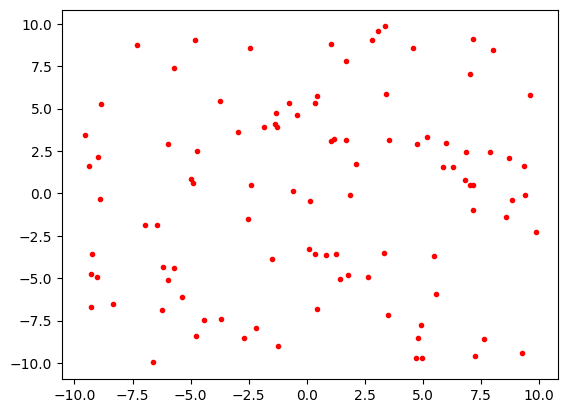

In [30]:
x = np.array([ [np.random.uniform(-10,10),
                np.random.uniform(-10,10)]   
                for _ in range(100)])
plt.plot(x[:,0],x[:,1],'r.')
plt.show()

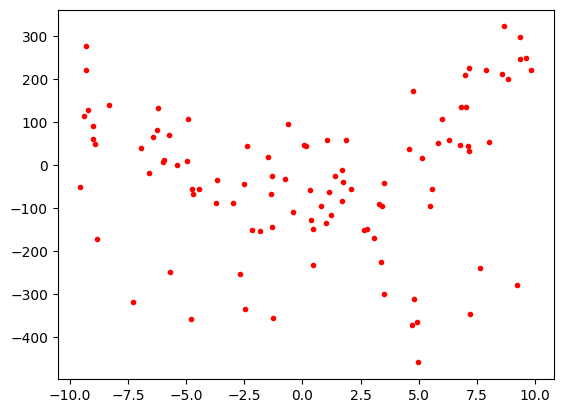

In [31]:
x_1 = x[:,0]
x_2 = x[:,1]
y = 2*(x_1**2)+3*(x_1*x_2)+4*x_1+2.3*x_2-3.5*(x_2**2)+7 + np.random.uniform(-100,100,size=(100))
plt.plot(x_1, y, 'r.')
plt.show()

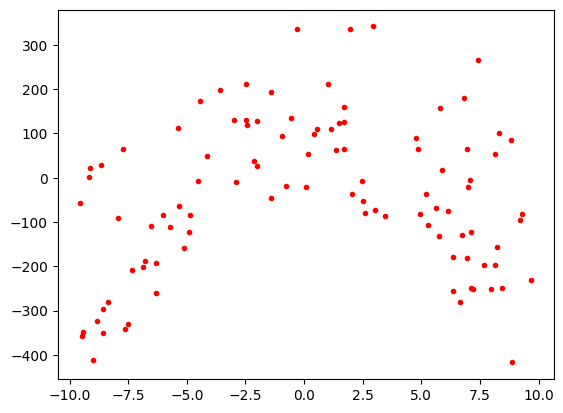

In [27]:
plt.plot(x_2, y, 'r.')
plt.show()

In [32]:
xt = pf.transform(x)

In [33]:
x_train, x_test, y_train, y_test = train_test_split(xt, y)

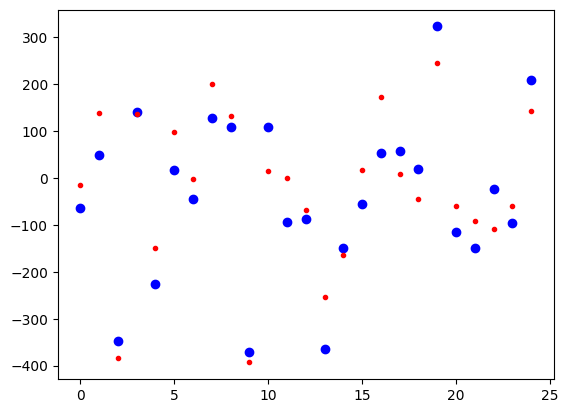

In [36]:
model = LinearRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)

plt.plot(y_test, 'bo')
plt.plot(pred, 'r.')
plt.show()

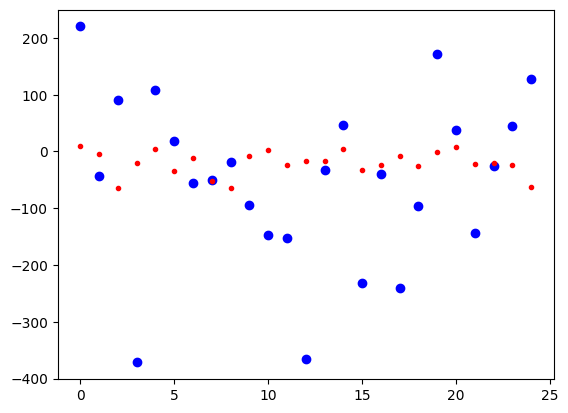

In [37]:
x_train2 , x_test2, y_train2, y_test2 = train_test_split(x,y)
model2 = LinearRegression()
model2.fit(x_train2, y_train2)
pred2 = model2.predict(x_test2)

plt.plot(y_test2, 'bo')
plt.plot(pred2, 'r.')
plt.show()

In [38]:
model.score(x_test, y_test)

0.8398962313712985

In [40]:
model2.score(x_test2, y_test2)

-0.05402432563853954

# 규제 선형 모델

## 릿지 회귀 (Ridge Regression)

In [57]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import seaborn as sns

In [58]:
df = pd.read_csv('boston_house.csv')
y = df['Target']
x = df.drop(['Target'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x,y)

In [59]:
# 𝛂 = 0으로 설정
ridge = Ridge()
neg_mse_scores = cross_val_score(ridge, x, y, scoring='neg_mean_squared_error', cv=5) # 개별 Negative MSE
rmse_scores = np.sqrt(-1 * neg_mse_scores) # 개별 RMSE
avg_rmse = np.mean(rmse_scores) # 평균 RMSE

print('5 folds의 개별 Negative MSE scores:', np.round(neg_mse_scores))
print('5 folds의 개별 RMSE scores:', np.round(rmse_scores, 3))
print('5 folds의 평균 RMSE scores: {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores: [-12. -24. -30. -80. -31.]
5 folds의 개별 RMSE scores: [3.422 4.856 5.449 8.957 5.578]
5 folds의 평균 RMSE scores: 5.653


In [60]:
# 𝛂 = 10으로 설정
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, x, y, scoring='neg_mean_squared_error', cv=5) # 개별 Negative MSE
rmse_scores = np.sqrt(-1 * neg_mse_scores) # 개별 RMSE
avg_rmse = np.mean(rmse_scores) # 평균 RMSE

print('5 folds의 개별 Negative MSE scores:', np.round(neg_mse_scores))
print('5 folds의 개별 RMSE scores:', np.round(rmse_scores, 3))
print('5 folds의 평균 RMSE scores: {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores: [-11. -24. -28. -75. -29.]
5 folds의 개별 RMSE scores: [3.38  4.929 5.305 8.637 5.34 ]
5 folds의 평균 RMSE scores: 5.518


In [61]:
alphas = [0.0001, 0.01, 0.1, 1, 2, 5, 10]

#alpha에 따른 평균 rmse 구함
for i, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    
    # cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산
    neg_mse_scores = cross_val_score(ridge, x, y, scoring='neg_mean_squared_error', cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('[{0}] 𝛂가 {1} 일때, 5 folds의 평균 RMSE: {2:.3f}'.format(i+1, alpha, avg_rmse))

[1] 𝛂가 0.0001 일때, 5 folds의 평균 RMSE: 5.829
[2] 𝛂가 0.01 일때, 5 folds의 평균 RMSE: 5.824
[3] 𝛂가 0.1 일때, 5 folds의 평균 RMSE: 5.788
[4] 𝛂가 1 일때, 5 folds의 평균 RMSE: 5.653
[5] 𝛂가 2 일때, 5 folds의 평균 RMSE: 5.611
[6] 𝛂가 5 일때, 5 folds의 평균 RMSE: 5.562
[7] 𝛂가 10 일때, 5 folds의 평균 RMSE: 5.518


### GridSearch 비교

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
params = { 'alpha':[0.0001, 0.01, 0.1, 1, 2, 5, 10]}

ridge = Ridge()
gs = GridSearchCV(ridge, param_grid=params)
gs.fit(x_train, y_train)
print(gs.best_params_)

{'alpha': 10}


In [52]:
ridge = Ridge(alpha=0.1)
ridge.fit(x_train, y_train)
pred = ridge.predict(x_test)
ridge.score(x_test, y_test)

0.8398971303785467

In [53]:
model = gs.best_estimator_
pred = model.predict(x_test)
model.score(x_test, y_test)

0.8399853605081131

###

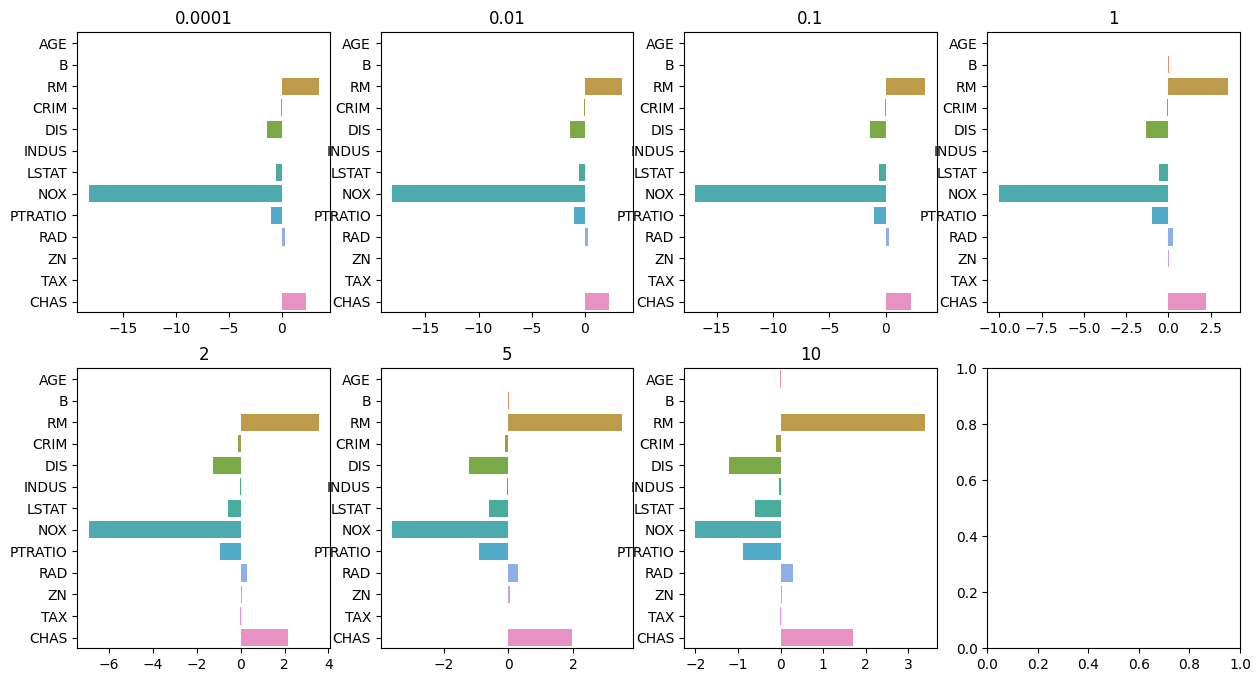

In [63]:
alphas = [0.0001, 0.01, 0.1, 1, 2, 5, 10]
rdf = pd.DataFrame()
_,axs = plt.subplots(nrows=2,ncols=4, figsize=(15,8))

#alpha에 따른 평균 rmse 구함
for i, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    
    nr = int(i/4)
    nc = i%4
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_train, y_train)
    cs = pd.Series(ridge.coef_, index=x.columns)
    rdf[str(alpha)] = cs
    
    sns.barplot(x=cs.values, y=cs.index, ax=axs[nr][nc])
    axs[nr][nc].set_title(str(alpha))
plt.show()

In [64]:
df

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,69.1,391.99,6.593,0.06263,2.4786,11.93,9.67,0.573,21.0,1,0.0,273,0,22.4
502,76.7,396.90,6.120,0.04527,2.2875,11.93,9.08,0.573,21.0,1,0.0,273,0,20.6
503,91.0,396.90,6.976,0.06076,2.1675,11.93,5.64,0.573,21.0,1,0.0,273,0,23.9
504,89.3,393.45,6.794,0.10959,2.3889,11.93,6.48,0.573,21.0,1,0.0,273,0,22.0


In [65]:
rdf

,0.0001,0.01,0.1,1,2,5,10
AGE,0.006097,0.005958,0.004790,-0.001550,-0.004264,-0.006649,-0.006911
B,0.007372,0.007381,0.007454,0.007861,0.008048,0.008251,0.008345
RM,3.475677,3.477204,3.489824,3.547843,3.557119,3.512882,3.397583
CRIM,-0.106168,-0.106111,-0.105635,-0.103057,-0.101956,-0.100964,-0.100720
DIS,-1.437547,-1.435427,-1.417622,-1.319299,-1.274760,-1.227241,-1.203804
INDUS,0.031767,0.031100,0.025498,-0.005366,-0.019246,-0.033752,-0.040362
LSTAT,-0.566364,-0.566460,-0.567286,-0.572795,-0.576651,-0.584982,-0.596101
NOX,-18.262681,-18.115238,-16.876718,-10.028345,-6.916415,-3.588512,-1.996749
PTRATIO,-1.063105,-1.061306,-1.046208,-0.963494,-0.926979,-0.891030,-0.878513
RAD,0.318333,0.317963,0.314867,0.298342,0.291664,0.286953,0.288457


## 라쏘 회귀 (Lasso Regression)

In [66]:
from sklearn.linear_model import Lasso, ElasticNet

In [67]:
# 𝛂 에 따른 회귀 모델의 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환
def get_linear_reg_eval(model_name, params=None, x_data_n=None, y_target_n=None, verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    
    if verbose:
        print('###### {0} ######'.format(model_name))
    
    for param in params:
        if (model_name == 'Ridge'):
            model = Ridge(alpha=param)
        elif (model_name == 'Lasso'):
            model = Lasso(alpha=param)
        elif (model_name == 'ElasticNet'):
            model = ElasticNet(alpha=param)
            
        neg_mse_scores = cross_val_score(model, x_data_n, y_target_n, scoring='neg_mean_squared_error', cv=5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('𝛂 = {0} 일 때, 5폴드 세트의 평균 RMSE: {1:.3f}'.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        
        model.fit(x_data_n, y_target_n)
        if return_coeff:
            # 𝛂에 따른 feature 별 회귀 계수를 Series로 변환, 이를 DataFrame columns로 추가
            coeff = pd.Series(data=model.coef_, index=x_data_n.columns)
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff

In [68]:
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, x_data_n=x, y_target_n=y)

###### Lasso ######


ValueError: 'neg_mean-_squared_error' is not a valid scoring value. Use sklearn.metrics.get_scorer_names() to get valid options.